In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as hcluster
from sklearn.cluster import AgglomerativeClustering

In [3]:
HIV_df=pd.read_csv('HIV_dataset.csv') 

In [4]:
HIV_df.head(5)

,Age,Marital Status,STD,Educational Background,HIV TEST IN PAST YEAR,AIDS education,Places of seeking sex partners,SEXUAL ORIENTATION,Drug- taking,Status
0,22,2,2,1,1,2,Bar,1,1,1
1,20,2,2,1,2,1,None,1,2,2
2,23,1,1,1,2,1,None,3,2,2
3,24,1,2,1,1,1,Park,1,1,1
4,18,2,1,2,1,2,Internet,1,1,1


In [5]:
columns_to_drop=['Educational Background', 'Places of seeking sex partners']

In [6]:
HIV_df=HIV_df.drop(columns_to_drop,axis=1)

In [7]:
HIV_df.dtypes

Age                      int64
Marital Status           int64
STD                      int64
HIV TEST IN PAST YEAR    int64
AIDS education           int64
SEXUAL ORIENTATION       int64
Drug- taking             int64
Status                   int64
dtype: object

In [8]:
HIV_df.describe()

,Age,Marital Status,STD,HIV TEST IN PAST YEAR,AIDS education,SEXUAL ORIENTATION,Drug- taking,Status
count,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000
mean,40.022923,2.246418,1.531519,1.613181,1.591691,1.683381,1.574499,1.504298
std,18.154906,1.144895,0.499363,0.487371,0.491873,0.804424,0.494773,0.500340
min,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,25.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,38.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000
75%,54.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,80.000000,5.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000


<Axes: >

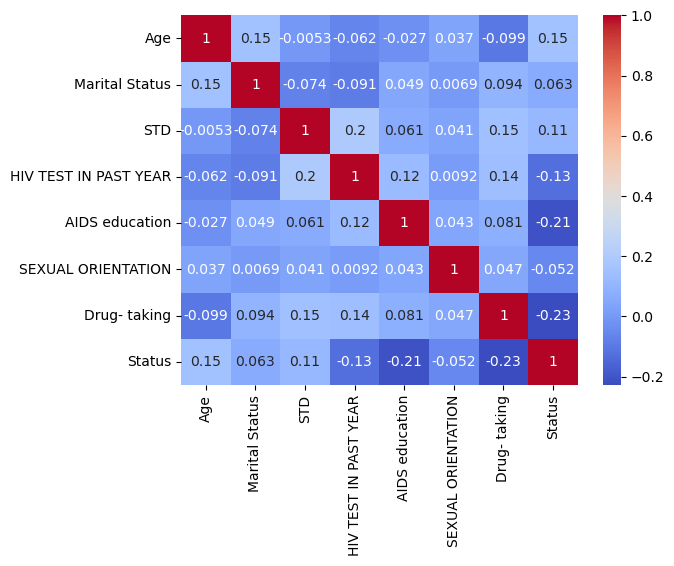

In [9]:
# Create a correlation matrix
corr_matrix = HIV_df.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, cmap = 'coolwarm', annot=True)

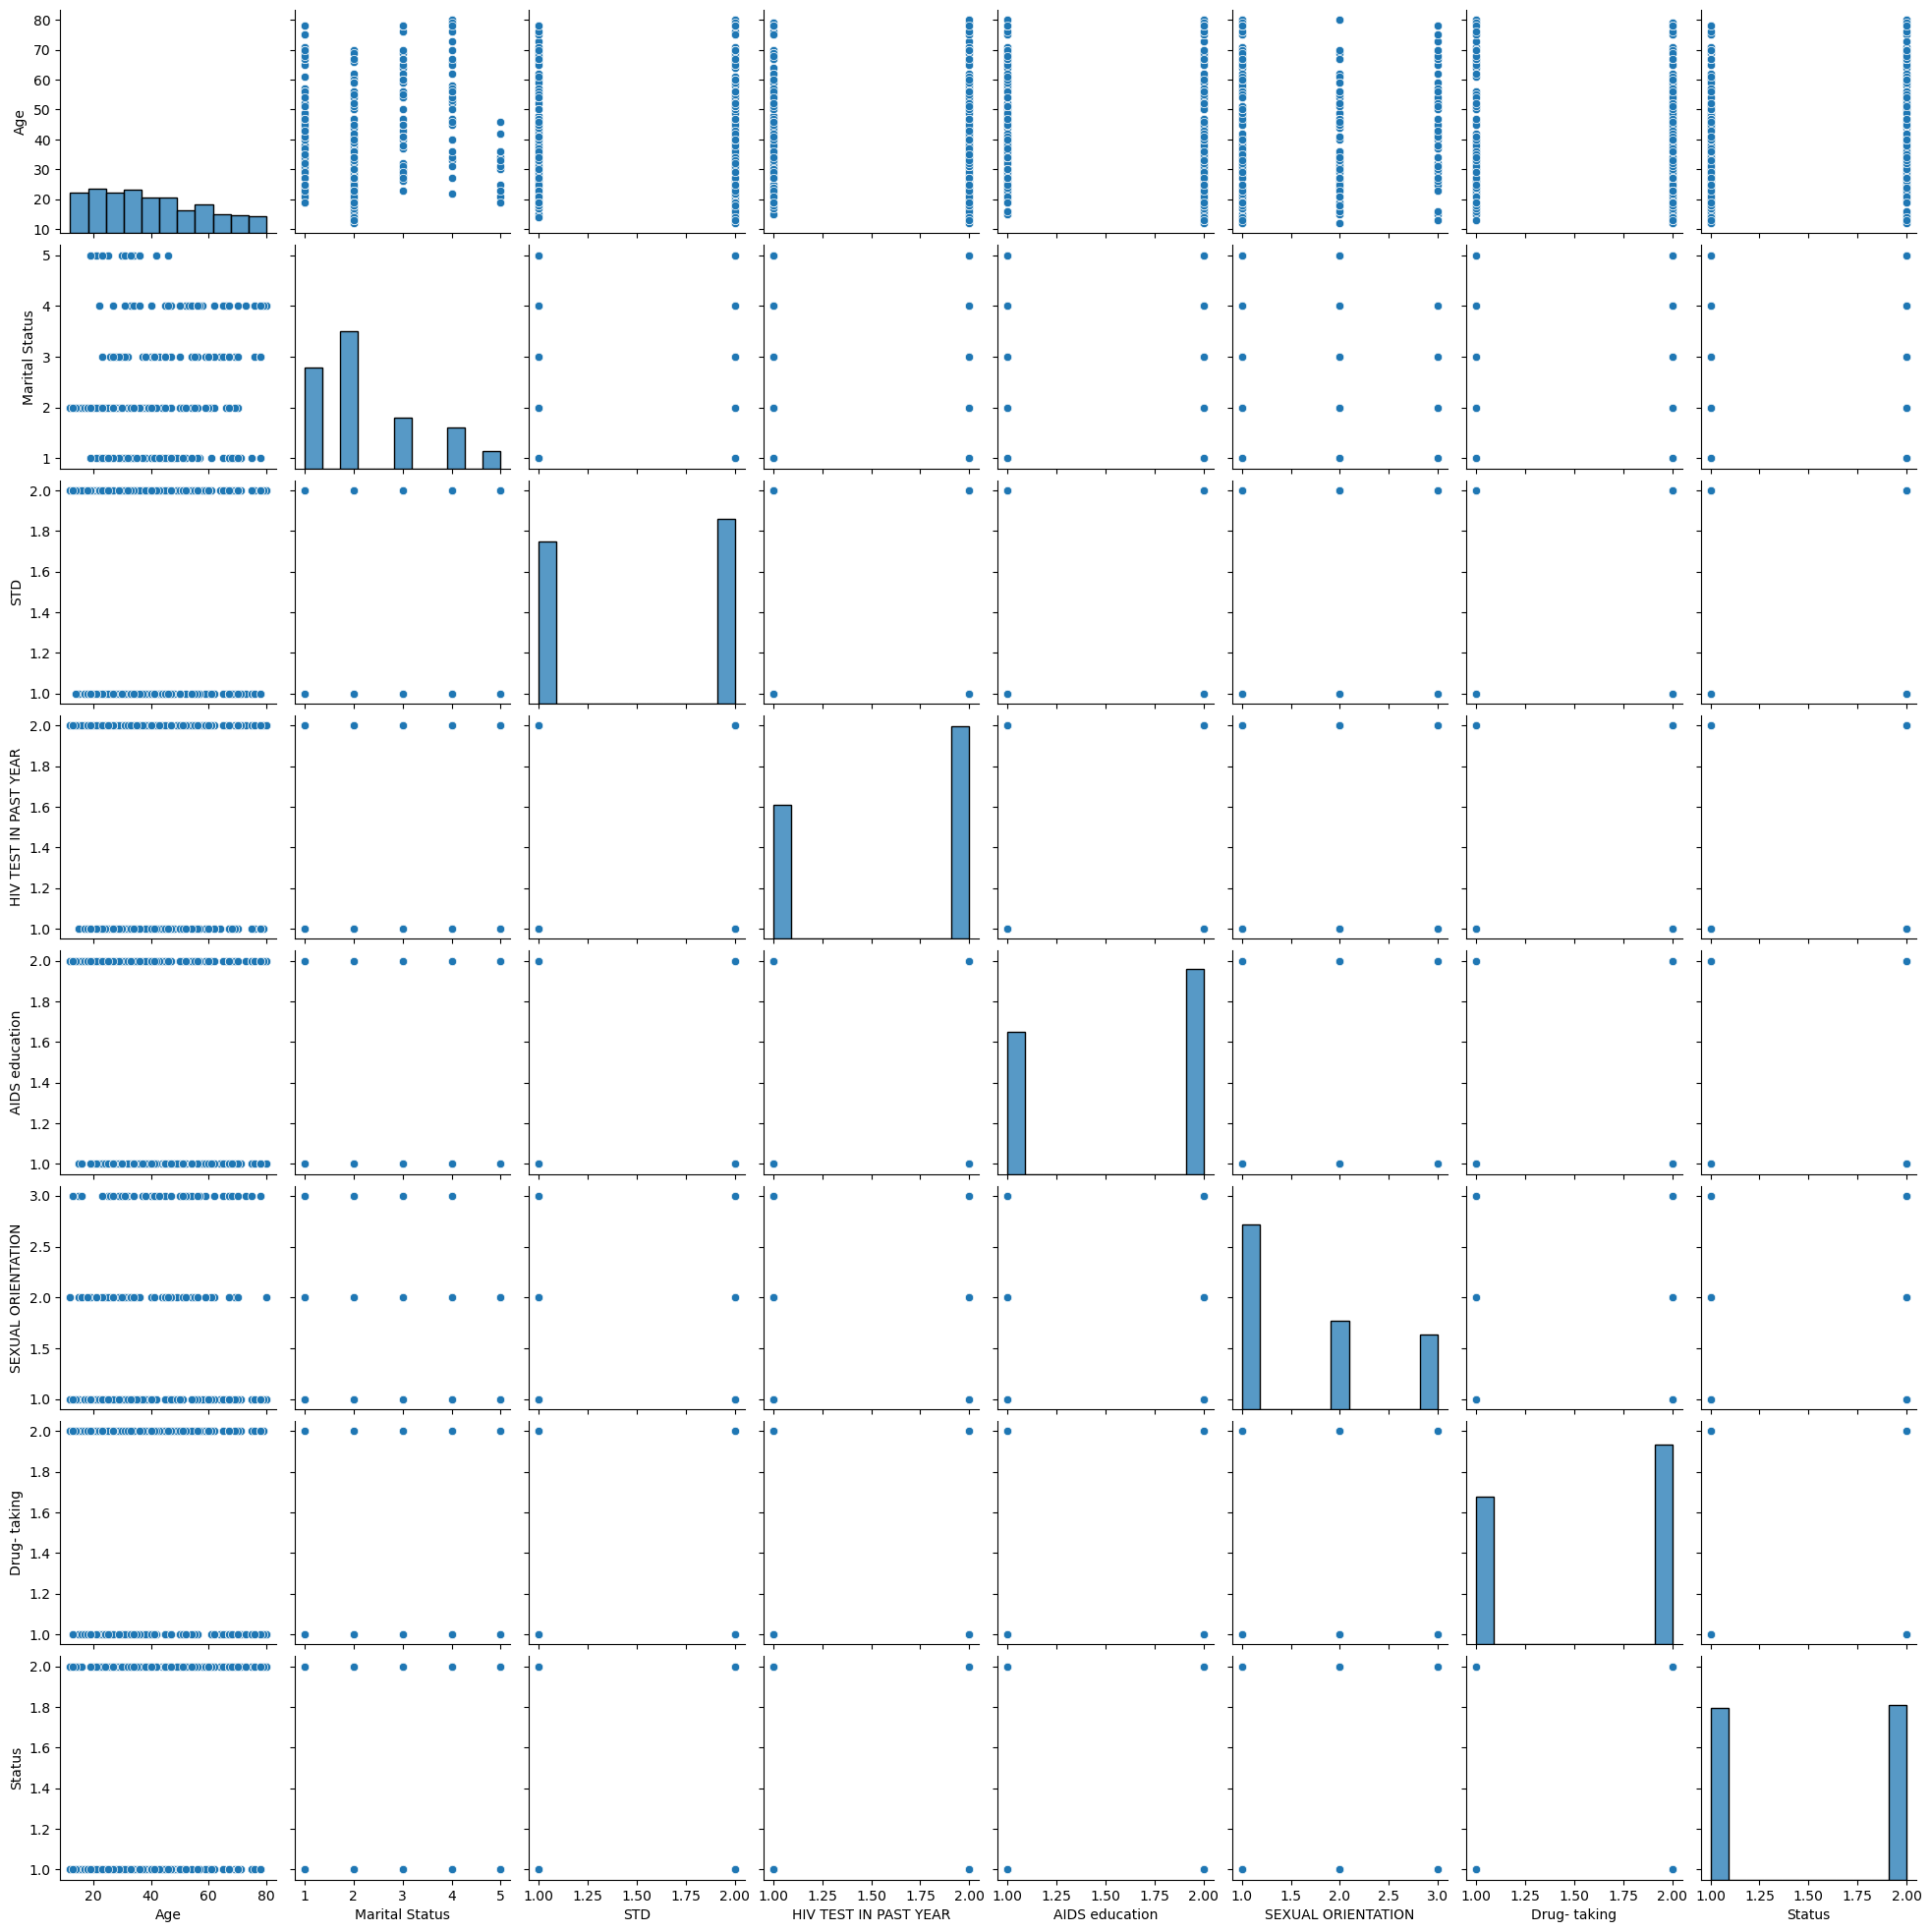

In [11]:
sns.pairplot(HIV_df)

In [12]:
#Scaling data to avoid biases 
scaling=StandardScaler()
scaled=scaling.fit_transform(HIV_df)

In [13]:
scaled_df=pd.DataFrame(scaled,columns=HIV_df.columns)
#print scaled dataset
scaled_df.head()

,Age,Marital Status,STD,HIV TEST IN PAST YEAR,AIDS education,SEXUAL ORIENTATION,Drug- taking,Status
0,-0.993442,-0.215387,0.938830,-1.259041,0.830706,-0.850138,-1.161967,-1.008633
1,-1.103684,-0.215387,0.938830,0.794255,-1.203795,-0.850138,0.860609,0.991441
2,-0.938321,-1.089456,-1.065156,0.794255,-1.203795,1.637896,0.860609,0.991441
3,-0.883200,-1.089456,0.938830,-1.259041,-1.203795,-0.850138,-1.161967,-1.008633
4,-1.213926,-0.215387,-1.065156,-1.259041,0.830706,-0.850138,-1.161967,-1.008633


<Axes: >

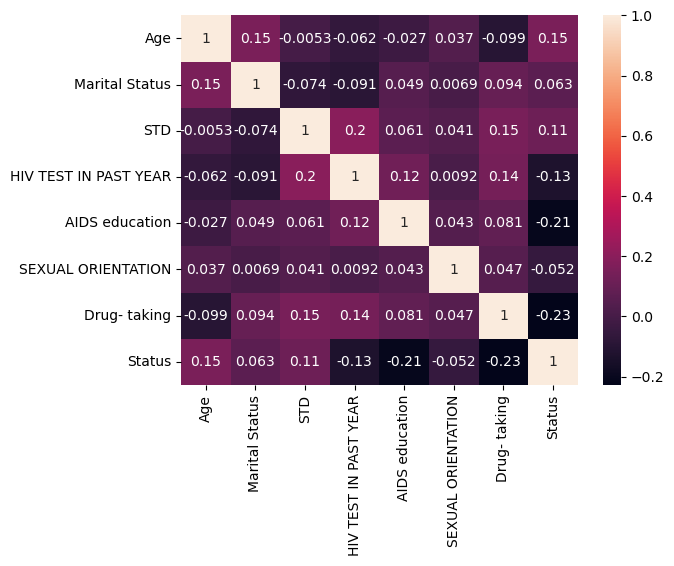

In [14]:
corr_matrix=HIV_df.corr()
sns.heatmap(corr_matrix,annot=True)

In [15]:
HIV_df.describe()

,Age,Marital Status,STD,HIV TEST IN PAST YEAR,AIDS education,SEXUAL ORIENTATION,Drug- taking,Status
count,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000
mean,40.022923,2.246418,1.531519,1.613181,1.591691,1.683381,1.574499,1.504298
std,18.154906,1.144895,0.499363,0.487371,0.491873,0.804424,0.494773,0.500340
min,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,25.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,38.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000
75%,54.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,80.000000,5.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000


/home/student/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/student/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/student/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/student/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

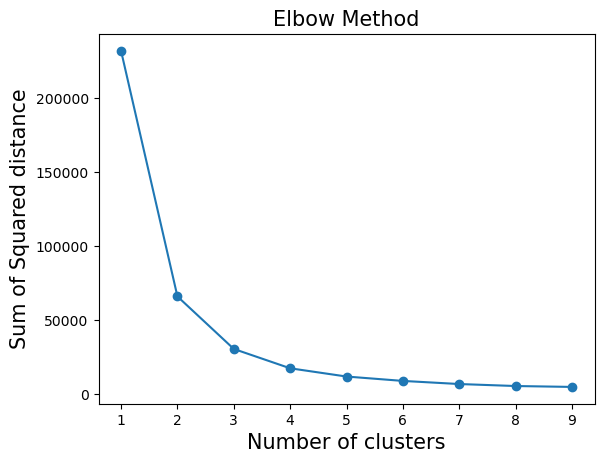

In [16]:
#plot elbow curve
a=[]
K=range(1,10)
for i in K:
    kmean=KMeans(n_clusters=i)
    kmean.fit(HIV_df)
    a.append(kmean.inertia_)
plt.plot(K,a,marker='o')
plt.title('Elbow Method',fontsize=15)
plt.xlabel('Number of clusters', fontsize=15)
plt.ylabel('Sum of Squared distance', fontsize=15)
plt.show()

In [17]:
#choosing number of clusters as 2 and refitting kmeand model
kmeans = KMeans(n_clusters = 2, random_state = 111)
kmeans.fit(scaled_df)

/home/student/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=111)

In [18]:
#count number of records in every cluster
pd.Series(kmeans.labels_).value_counts()

0    354
1    344
dtype: int64

In [19]:
#calculate how good our model is
#calculate Silhoutte Coeffient for K=2

metrics.silhouette_score(scaled_df, kmeans.labels_)

0.14856921855541194

In [20]:
preds = kmeans.labels_ 
kmeans_df = pd.DataFrame(HIV_df)
kmeans_df['KMeans_Clusters'] = preds 
kmeans_df.head(10)

,Age,Marital Status,STD,HIV TEST IN PAST YEAR,AIDS education,SEXUAL ORIENTATION,Drug- taking,Status,KMeans_Clusters
0,22,2,2,1,2,1,1,1,1
1,20,2,2,2,1,1,2,2,0
2,23,1,1,2,1,3,2,2,0
3,24,1,2,1,1,1,1,1,1
4,18,2,1,1,2,1,1,1,1
5,15,2,1,2,2,3,2,2,0
6,15,2,1,2,2,1,1,2,0
7,15,2,2,1,2,3,2,1,1
8,15,2,1,1,1,1,1,1,1
9,15,2,2,2,2,1,2,2,0


In [21]:
# save a kmeans file
kmeans_df.to_csv('kmeans_result.csv',index=False)

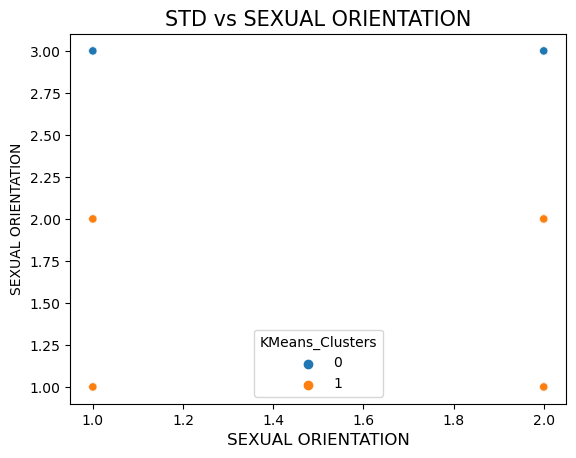

In [24]:
#visualization of clusters age and fare
sns.scatterplot(data=kmeans_df, x='STD', y='SEXUAL ORIENTATION', hue='KMeans_Clusters')
plt.title('STD vs SEXUAL ORIENTATION', fontsize=15)
plt.xlabel('STD', fontsize=12)
plt.xlabel('SEXUAL ORIENTATION', fontsize=12)
plt.show()